In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
stud = pd.read_csv('stud_math.xls')

In [3]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [5]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures',
                'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'health', 'absences', 'score']
# переименовываем колонки для удобства
# renaming of columns 

In [7]:
stud.head(5)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [8]:
# функции для обработки столбцов
# columns processing functions

def fix_yes_or_no(x):
    """function to replace "yes" or "no" to 1 and 0"""
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    if x == 'yes':
        x = float(1.0)
    if x == 'no':
        x = float(0)
    return x


def fix_nan(x):
    """function to replace NaN"""
    if pd.isnull(x) or x == "NaN":
        x = None
    return x


def fix_job(x):
    """function to replace str in job column with int"""
    if x == None or x == "NaN":
        x = None
    elif x == 'at_home':
        x = 1
    elif x == 'health':
        x = 2
    elif x == 'teacher':
        x = 3
    elif x == 'services':
        x = 4
    else:
        x = 0
    return x


def fix_reason(x):
    """function to replace str in reason column with int"""
    if x == None or x == "NaN":
        x = None
    elif x == 'course':
        x = 1
    elif x == 'home':
        x = 2
    elif x == 'reputation':
        x = 3
    else:
        x = 0
    return x


def fix_guardian(x):
    """function to replace str in guardian column with int"""
    if x == None or x == "NaN":
        x = None
    elif x == 'mother':
        x = 1
    elif x == 'father':
        x = 2
    else:
        x = 0
    return x


def get_stat_dif(column):
    """function to calculate the T-test"""
    cols = stud.loc[:, column].value_counts().index[:6]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    """function to create boxplot"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Обработка столбцов / Columns processing

## school

In [9]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [10]:
stud.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Выводы: в столбце два уникальных значения, пустые ячейки отсутствуют. 
#### Findings: there are 2 unique values, no missing values

## sex

In [11]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


In [12]:
stud.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Выводы: в столбце два уникальных значения, пустые ячейки отсутствуют
#### Findings: there are 2 unique values, no missing values

## age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

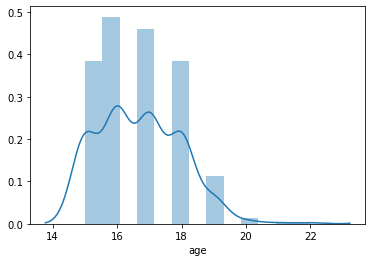

In [13]:
sns.distplot(stud.age)
stud.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


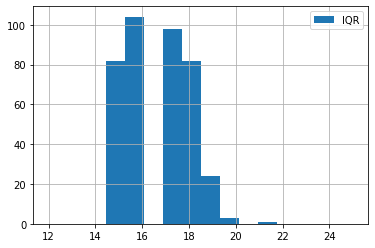

In [14]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(12, 25),
                                                                        label='IQR')
plt.legend()

In [15]:
stud[(stud.age > 21) | (stud.age < 13)].age.count()

1

In [16]:
stud = stud.loc[stud.age <= 21]

### выводы:
#### Бимодальное распределение. Был удален 1 выброс за верхней границей
#### Bimodal distribution, 1 outlier deleted.

## address

In [17]:
pd.DataFrame(stud.address.value_counts())

,address
U,294
R,83


In [18]:
stud.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## fam_size

In [19]:
pd.DataFrame(stud.fam_size.value_counts())

,fam_size
GT3,260
LE3,107


In [20]:
stud.loc[:, ['fam_size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## p_status

In [21]:
pd.DataFrame(stud.p_status.value_counts())

,p_status
T,313
A,36


In [22]:
stud.loc[:, ['p_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  349 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## m_edu

In [23]:
pd.DataFrame(stud.m_edu.value_counts())

,m_edu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


In [24]:
stud.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 5 unique values, relatively small amount of missing values

## f_edu

In [25]:
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


In [26]:
stud[stud.f_edu == 40].f_edu.count()

1

In [27]:
stud = stud.loc[stud.f_edu != 40.0]  # удаляем некорректное значение 40.0

In [28]:
stud.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   369 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек. Удалено 1 некорректное значение 40.0
#### Findings: there are 5 unique values, relatively small amount of missing values. 1 incorrect value of 40.0 deleted

## m_job

In [29]:
pd.DataFrame(stud.m_job.value_counts())

,m_job
other,133
services,96
at_home,58
teacher,55
health,32


In [30]:
stud.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 5 unique values, relatively small amount of missing values

## f_job

In [31]:
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,196
services,101
teacher,29
at_home,16
health,15


In [32]:
stud.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   357 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 5 unique values, relatively small amount of missing values

## reason

In [33]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,102
other,33


In [34]:
stud.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  376 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 4 unique values, relatively small amount of missing values

## guardian

In [35]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,249
father,85
other,28


In [36]:
stud.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце три уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 3 unique values, relatively small amount of missing values

## travel_time

In [37]:
pd.DataFrame(stud.travel_time.value_counts())

,travel_time
1.0,241
2.0,96
3.0,21
4.0,7


In [38]:
stud.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 4 unique values, relatively small amount of missing values

## study_time

In [39]:
pd.DataFrame(stud.study_time.value_counts())

,study_time
2.0,194
1.0,102
3.0,63
4.0,27


In [40]:
stud.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 4 unique values, relatively small amount of missing values

## failures

In [41]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,292
1.0,49
2.0,16
3.0,14


In [42]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  371 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 4 unique values, relatively small amount of missing values

## school_sup

In [43]:
pd.DataFrame(stud.school_sup.value_counts())

,school_sup
no,333
yes,51


In [44]:
stud.loc[:, ['school_sup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  384 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## fam_sup

In [45]:
pd.DataFrame(stud.fam_sup.value_counts())

,fam_sup
yes,218
no,136


In [46]:
stud.loc[:, ['fam_sup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  354 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## paid

In [47]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,198
yes,155


In [48]:
stud.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## activities

In [49]:
pd.DataFrame(stud.activities.value_counts())

,activities
yes,194
no,185


In [50]:
stud.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  379 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## nursery

In [51]:
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,299
no,78


In [52]:
stud.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  377 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## studytime_granular

In [53]:
pd.DataFrame(stud.studytime_granular.value_counts())

,studytime_granular
-6.0,194
-3.0,102
-9.0,63
-12.0,27


In [54]:
stud.loc[:, ['studytime_granular']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 4 unique values, relatively small amount of missing values

## higher

In [55]:
pd.DataFrame(stud.higher.value_counts())

,higher
yes,355
no,18


In [56]:
stud.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## internet

In [57]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,303
no,56


In [58]:
stud.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  359 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## romantic 

In [59]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,239
yes,123


In [60]:
stud.loc[:, ['romantic']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек
#### Findings: there are 2 unique values, relatively small amount of missing values

## fam_rel	

In [61]:
pd.DataFrame(stud.fam_rel.value_counts())

,fam_rel
4.0,182
5.0,97
3.0,62
2.0,17
1.0,7
-1.0,1


In [62]:
stud.loc[:, ['fam_rel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце шесть уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 6 unique values, relatively small amount of missing values

## free_time

In [63]:
pd.DataFrame(stud.free_time.value_counts())

,free_time
3.0,153
4.0,111
2.0,62
5.0,38
1.0,18


In [64]:
stud.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 5 unique values, relatively small amount of missing values

## go_out	

In [65]:
pd.DataFrame(stud.go_out.value_counts())

,go_out
3.0,127
2.0,100
4.0,84
5.0,51
1.0,23


In [66]:
stud.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 5 unique values, relatively small amount of missing values

## health

In [67]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,62
1.0,46
2.0,43


In [68]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек
#### Findings: there are 5 unique values, relatively small amount of missing values

## absences

count    381.000000
mean       7.265092
std       23.522007
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

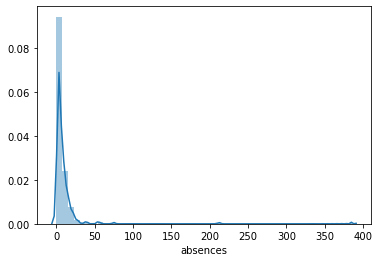

In [69]:
sns.distplot(stud.absences)
stud.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


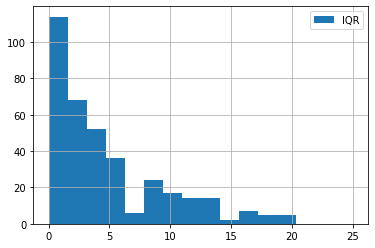

In [70]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 25),
                                                                                  label='IQR'),
plt.legend()

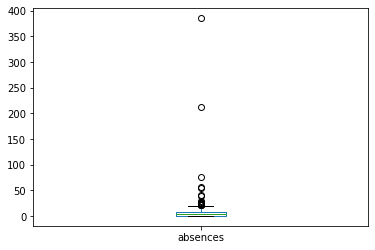

In [71]:
stud.absences.plot.box()  # boxplot to visualise outliers

In [72]:
stud.loc[stud.absences > 50].absences.count()

5

In [73]:
stud = stud.loc[stud.absences <= 50]

#### Выводы: распределение смещенное вправо. Были удалены 5 выбросов за верхней границей
#### Findings: positive skewed distribution. 5 outliers deleted

## score

count    371.000000
mean      52.021563
std       22.926665
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

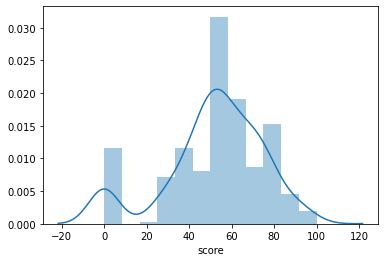

In [74]:
sns.distplot(stud.score)
stud.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


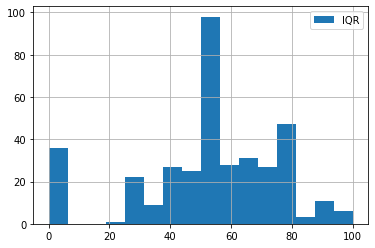

In [75]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 100),
                                                                            label='IQR')
plt.legend()

In [76]:
# удалим "нулевые" оценки, чтобы привести распределение к нормальному
# delete zero score to make distribution normal
stud = stud.loc[stud.score > 0]

#### Выводы: в целом нормальное распределение. Выбросов нет. Было удалено значительное количество "0" оценок
#### Findings: normal distribution after zero scores were deleted

In [77]:
for col in stud.columns:
    stud[col] = stud[col].apply(fix_nan)  # replacement "NaN" with None
# replacement yes and no with 1 or 0
for col in ['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stud[col] = stud[col].apply(fix_yes_or_no)

## Выводы: в целом, данные относительно чистые, выбросов и пустых значений немного
## Findings: data in the dataset is quite clean, there are not many outliers and missing values

## Вариант 1
## Variant 1

## Корреляционный анализ количественных переменных
## Correlation analisys of numerical data

In [78]:
stud.head(5)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-6.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-6.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,-6.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,-9.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F65707250>,
      dtype=object)

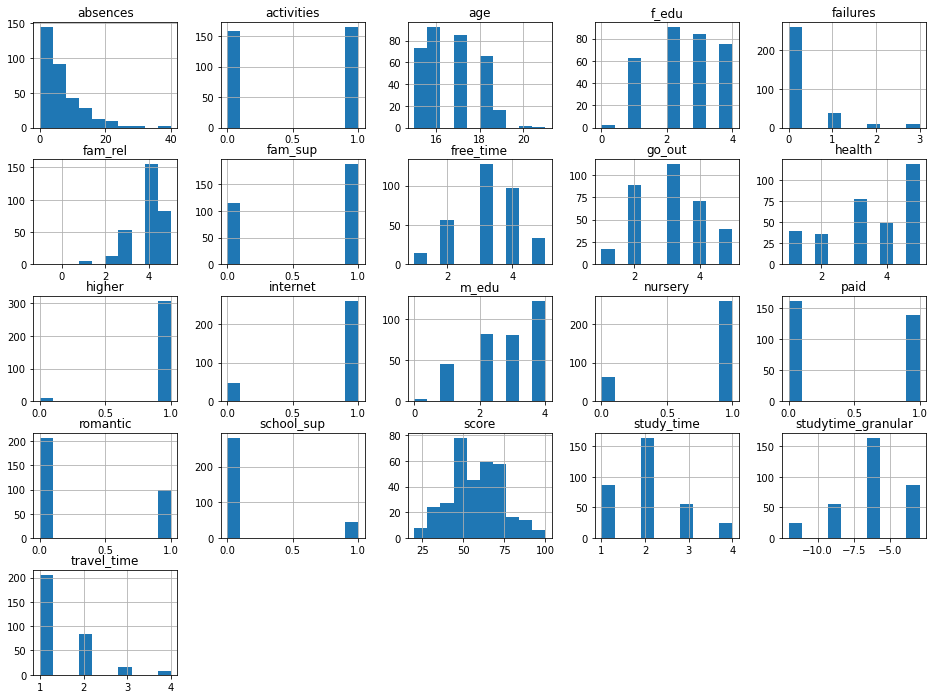

In [79]:
# histogramms to see numerical values distribution
stud.hist(alpha=1, figsize=(16, 12))

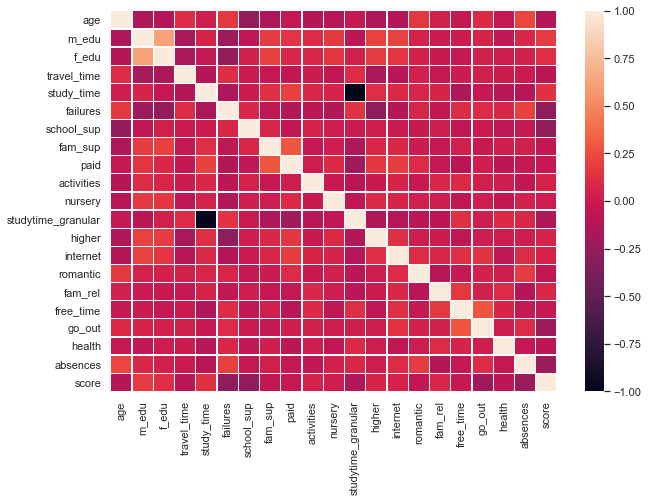

In [80]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(stud.corr(), linewidths=.25, ax=ax)

### Выводы: по результатам анализа heatmap можно выделить показатели "age", "failures", "school_sup", "go_out", "absences", "m_edu", "f_edu", "study_time" как оказывающие влияние на показатель "score". Переменные "study_time" и "studytime_granular" полностью обратно скоррелированы, необходимо использовать только один из них 
### Findings: based on heatmap visual analysis there is correlation between values "age", "failures", "school_sup", "go_out", "absences", "m_edu", "f_edu", "study_time" and "score'. As values "study_time" и "studytime_granular" are perfectly negatively correlated, "studytime_granular" is excluded.

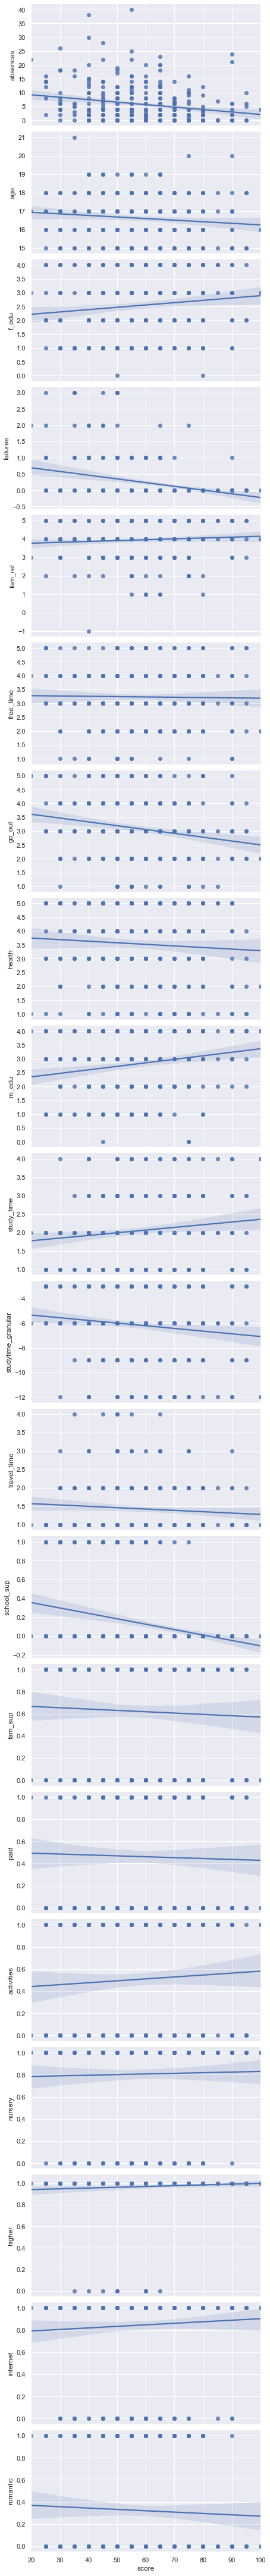

In [81]:
sns.pairplot(stud, x_vars=['score'], y_vars=['absences', 'age', 'f_edu', 'failures', 'fam_rel', 'free_time', 'go_out', 'health', 'm_edu', 'study_time',
                                             'studytime_granular', 'travel_time', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], kind='reg', height=3, aspect=2)

### Выводы: по результатам анализа pairplot видно, что есть взаимосвязь между показателями "age", "failures", "school_sup", "go_out", "absences", "m_edu", "f_edu", "study_time" и показателем "score". 
### Findings: based on pairplot visual analysis there is correlation between "age", "failures", "school_sup", "go_out", "absences", "m_edu", "f_edu", "study_time" and "score".

In [82]:
corr = stud.corr()

In [83]:
corr['score'].sort_values(ascending=False)

score                 1.000000
m_edu                 0.186029
study_time            0.137764
f_edu                 0.123465
fam_rel               0.080428
higher                0.067695
internet              0.061199
activities            0.056465
nursery               0.023301
free_time            -0.018374
paid                 -0.026062
fam_sup              -0.040754
romantic             -0.042370
health               -0.065991
travel_time          -0.083986
age                  -0.112809
studytime_granular   -0.137764
go_out               -0.204879
absences             -0.222187
school_sup           -0.266056
failures             -0.279272
Name: score, dtype: float64

### Выводы: переменные, коэффициенты корреляции которых составляют менее 0,1, не оказывают влияние на значение среднего балла и эти переменные можно опустить при построении модели:

### Findings: following values with corr() less then 0.1 can be dropped in the model:

- fam_rel;
- higher;
- internet;
- activities;
- nursery;
- free_time;
- paid;
- fam_sup;
- romantic;
- health;
- travel_time

## Анализ номинативных переменных
## Non-numeric data analysis

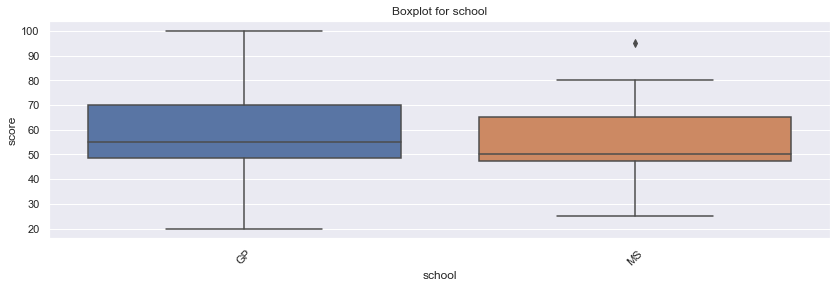

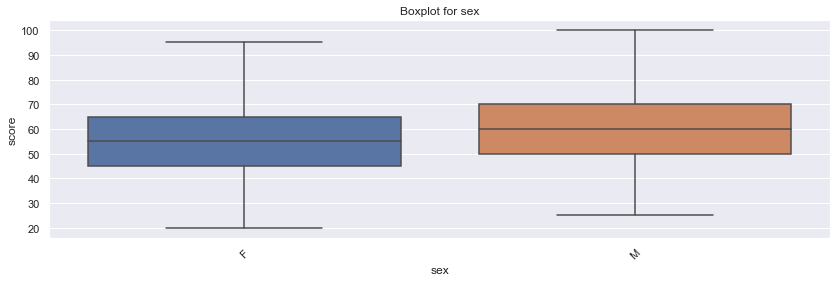

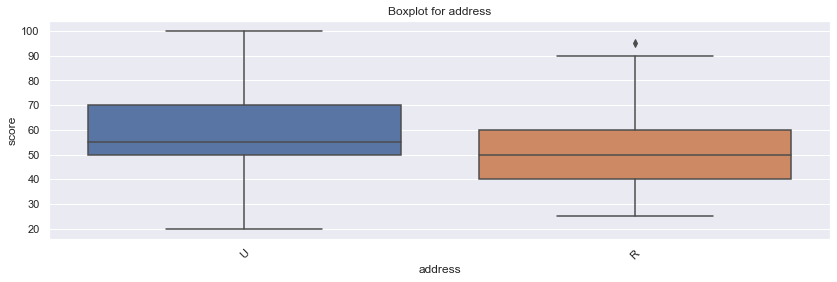

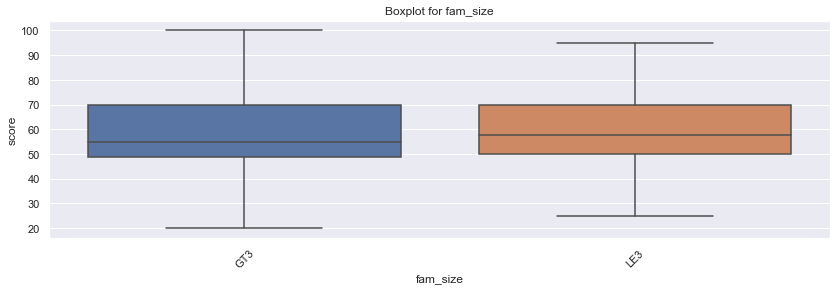

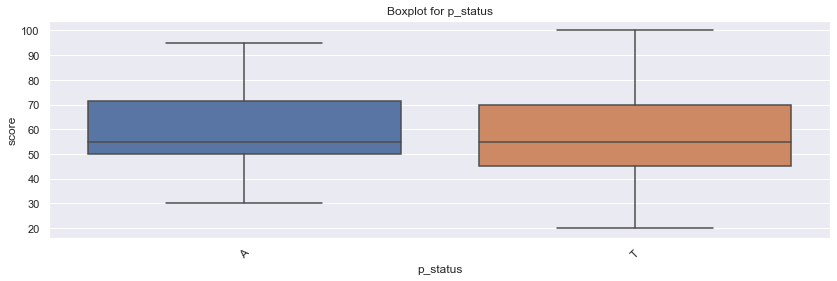

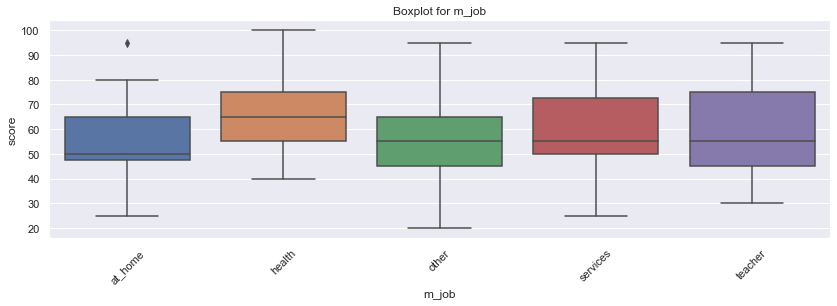

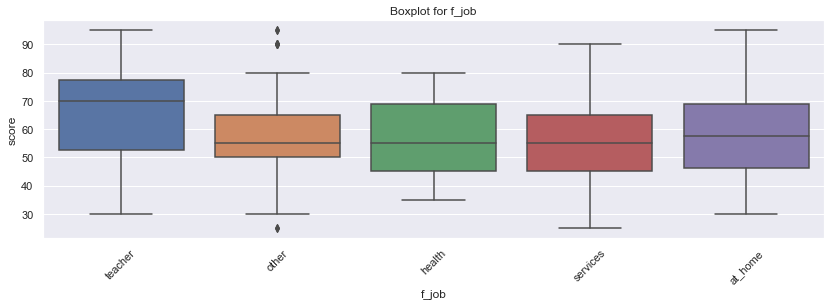

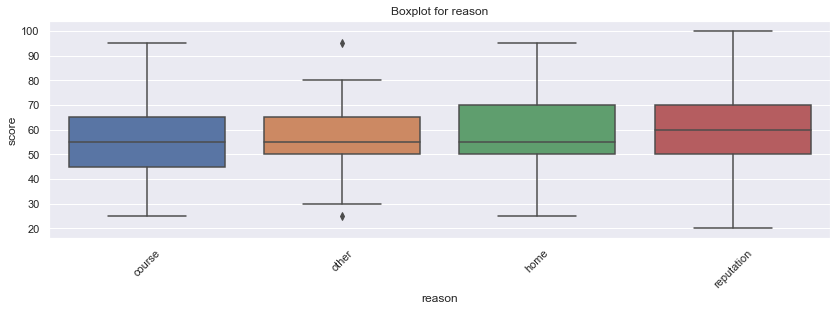

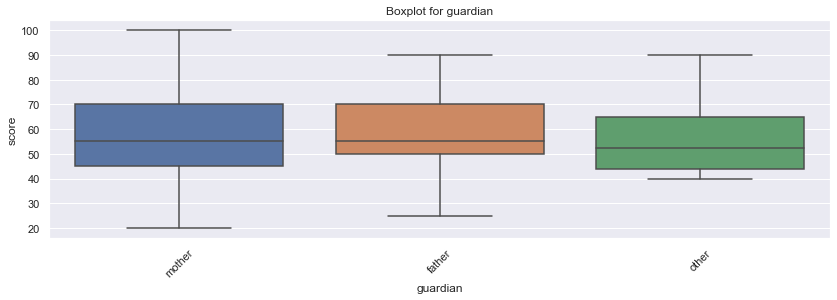

In [84]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian']:
    get_boxplot(col)

### Выводы: из анализа графиков видно, что наблюдается корреляция у таких переменных, как adress и m_job с переменной score
### Findings: visually is evident there is correlation between adress, m_job and score

In [85]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian']:
    get_stat_dif(col)  # T-test calculatiion

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job


## Вывод: по результатам анализа для построения модели логично использовать переменные: 'address', 'age', 'm_job', 'failures', 'school_sup','go_out', 'absences', 'm_edu', 'f_edu', 'study_time' и 'score'

## Findings: based on the analysis results we should include  'address', 'age', 'm_job', 'failures', 'school_sup','go_out', 'absences', 'm_edu', 'f_edu', 'study_time' и 'score' in the model

In [86]:
stud_for_model = stud[['address', 'age', 'm_job', 'failures', 'school_sup',
                       'go_out', 'absences', 'm_edu', 'f_edu', 'study_time', 'score']]  #DataFrame for the model

In [87]:
stud_for_model.head(5)

,address,age,m_job,failures,school_sup,go_out,absences,m_edu,f_edu,study_time,score
0,U,18,at_home,0.0,1.0,4.0,6.0,4.0,4.0,2.0,30.0
1,U,17,at_home,0.0,0.0,3.0,4.0,1.0,1.0,2.0,30.0
2,U,15,at_home,3.0,1.0,2.0,10.0,1.0,1.0,2.0,50.0
3,U,15,health,0.0,0.0,2.0,2.0,4.0,2.0,3.0,75.0
4,U,16,other,0.0,0.0,2.0,4.0,3.0,3.0,2.0,50.0


# Вариант 2
# Variant 2

### По результатам анализа данных в колонках видно, что у всех номинативных переменных относительно небольшое число уникальных значений (не более 5), поэтому можно заменить эти значения числовыми для удобства обработки и построения модели

### Based on the data analysis is clear that all non-numerical data has not more than 5 unique values, so we can replace them with relevant numeric values for the future model

In [88]:
stud.school = stud.school.apply(
    lambda x: 1 if x == 'GP' else (None if pd.isnull(x) else 0))
stud.sex = stud.sex.apply(
    lambda x: 1 if x == 'F' else (None if pd.isnull(x) else 0))
stud.address = stud.address.apply(
    lambda x: 1 if x == 'U' else (None if pd.isnull(x) else 0))
stud.fam_size = stud.fam_size.apply(
    lambda x: 1 if x == 'GT3' else (None if pd.isnull(x) else 0))
stud.p_status = stud.p_status.apply(
    lambda x: 1 if x == 'A' else (None if pd.isnull(x) else 0))
stud.m_job = stud.m_job.apply(fix_job)
stud.f_job = stud.f_job.apply(fix_job)
stud.reason = stud.reason.apply(fix_reason)
stud.guardian = stud.guardian.apply(fix_guardian)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F69312AF0>,
      dtype=object)

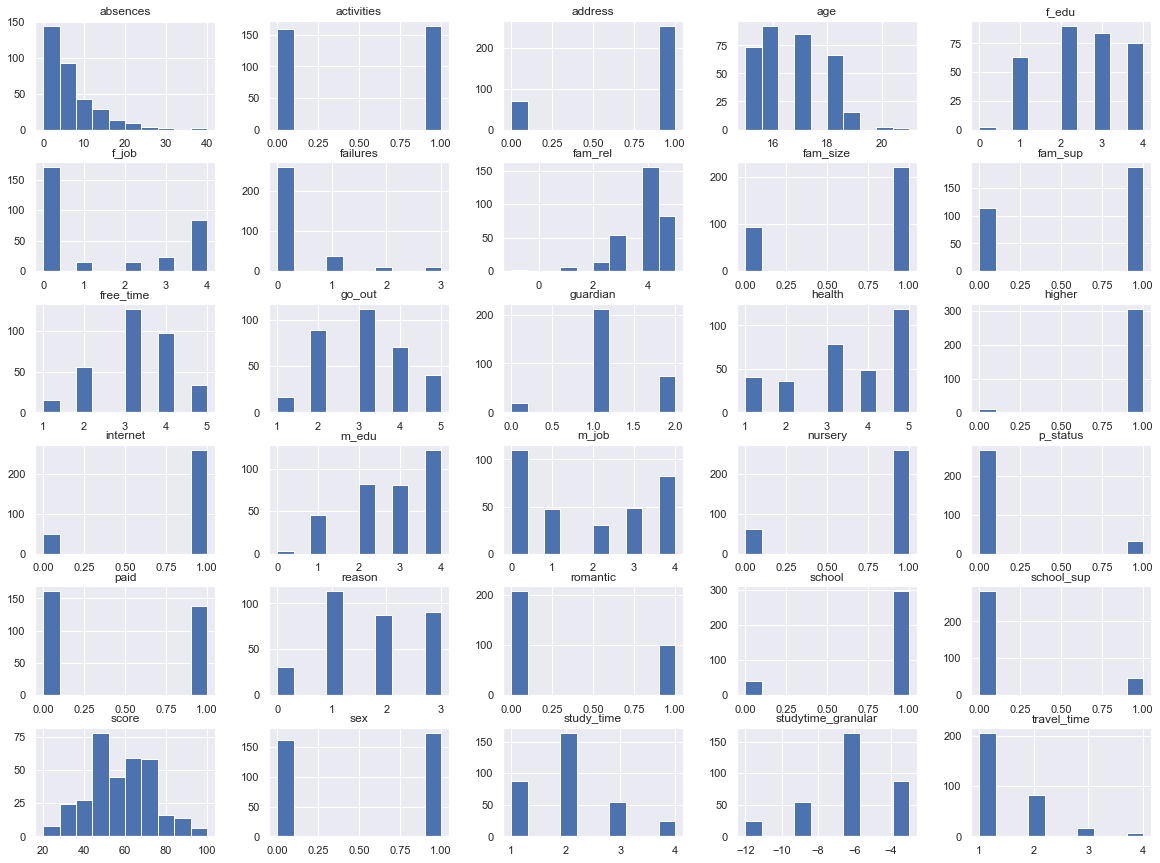

In [89]:
stud.hist(alpha=1, figsize=(20, 15))

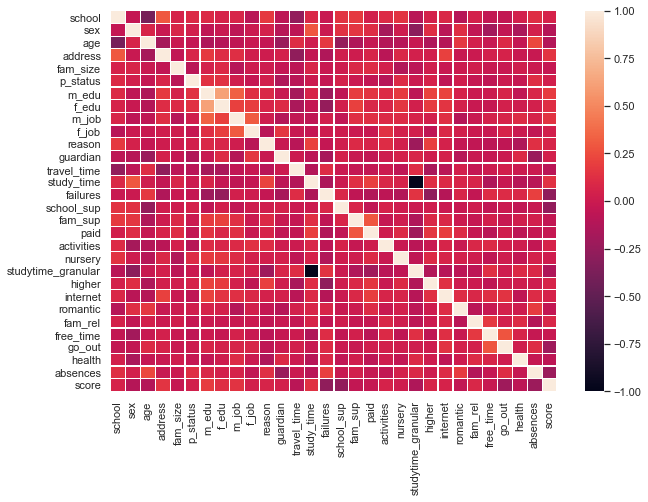

In [90]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(stud.corr(), linewidths=.25, ax=ax)

### Выводы: по результатам анализа heatmap визуально видно, что есть корреляция между переменными sex, age, address, m_edu, f_edu, m_job, failures, school_sup, study_time, go_out, absences и переменной score
### Findings: based on visual analysis of heatmap, there is correlation between sex, age, address, m_edu, f_edu, m_job, failures, school_sup, study_time, go_out, absences and score

In [91]:
# correlation calculation
corr = stud.corr()
corr['score'].sort_values(ascending=False)

score                 1.000000
m_edu                 0.186029
address               0.155613
m_job                 0.145091
study_time            0.137764
f_edu                 0.123465
fam_rel               0.080428
higher                0.067695
reason                0.066288
school                0.061866
internet              0.061199
activities            0.056465
guardian              0.043287
p_status              0.037968
f_job                 0.036967
nursery               0.023301
free_time            -0.018374
paid                 -0.026062
fam_size             -0.030442
fam_sup              -0.040754
romantic             -0.042370
health               -0.065991
travel_time          -0.083986
sex                  -0.103860
age                  -0.112809
studytime_granular   -0.137764
go_out               -0.204879
absences             -0.222187
school_sup           -0.266056
failures             -0.279272
Name: score, dtype: float64

### Выводы: по результатам анализа для построения модели логично использовать переменные: m_edu, address, m_job, study_time, f_edu, sex, age, go_out, absences, school_sup, failures, score, что совпадает с переменными которые мы отобрали в первом варианте решения, за исключением переменной sex
### Findings: based on correlation calculation for the model will be used m_edu, address, m_job, study_time, f_edu, sex, age, go_out, absences, school_sup, failures, score, which is equal to the 1st variant, except sex values

In [92]:
stud_for_model_var2 = stud[['address', 'sex', 'age', 'm_job', 'failures', 'school_sup',
                            'go_out', 'absences', 'm_edu', 'f_edu', 'study_time', 'score']]  #2nd variant of DataFrame for the model

In [93]:
stud_for_model_var2.head(5)

,address,sex,age,m_job,failures,school_sup,go_out,absences,m_edu,f_edu,study_time,score
0,1.0,1,18,1.0,0.0,1.0,4.0,6.0,4.0,4.0,2.0,30.0
1,1.0,1,17,1.0,0.0,0.0,3.0,4.0,1.0,1.0,2.0,30.0
2,1.0,1,15,1.0,3.0,1.0,2.0,10.0,1.0,1.0,2.0,50.0
3,1.0,1,15,2.0,0.0,0.0,2.0,2.0,4.0,2.0,3.0,75.0
4,1.0,1,16,0.0,0.0,0.0,2.0,4.0,3.0,3.0,2.0,50.0


## Вариант 3

## Variant 3

### Отберем переменные для построения модели, чтобы предсказать придет ли ученик на экзамен (по данным стобца 'presence')
### Let's find the values for the model to predict the presence on the exam

In [94]:
stud = pd.read_csv('stud_math.xls')
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures',
                'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'health', 'absences', 'score']
for col in ['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stud[col] = stud[col].apply(fix_yes_or_no)
stud.school = stud.school.apply(
    lambda x: 1 if x == 'GP' else (None if pd.isnull(x) else 0))
stud.sex = stud.sex.apply(
    lambda x: 1 if x == 'F' else (None if pd.isnull(x) else 0))
stud.address = stud.address.apply(
    lambda x: 1 if x == 'U' else (None if pd.isnull(x) else 0))
stud.fam_size = stud.fam_size.apply(
    lambda x: 1 if x == 'GT3' else (None if pd.isnull(x) else 0))
stud.p_status = stud.p_status.apply(
    lambda x: 1 if x == 'A' else (None if pd.isnull(x) else 0))
stud.m_job = stud.m_job.apply(fix_job)
stud.f_job = stud.f_job.apply(fix_job)
stud.reason = stud.reason.apply(fix_reason)
stud.guardian = stud.guardian.apply(fix_guardian)

# сформируем столбец "presence", предположив, что 0 баллов получили студенты, которые не пришли на экзамен
# adding 'presence' column to DataFrame, assuming zero score means 'no show'
stud['presence'] = stud.score.apply(
    lambda x: float(0.0) if x == 0 else float(1.0))

for col in stud.columns:
    stud[col] = stud[col].apply(fix_nan)  # replace "NaN" with None

In [95]:
corr = stud.corr()
corr['presence'].sort_values(ascending=False)

presence              1.000000
score                 0.740253
higher                0.172361
paid                  0.151409
m_edu                 0.120814
school_sup            0.101055
absences              0.100052
address               0.045615
p_status              0.044876
nursery               0.043483
f_edu                 0.041532
fam_rel               0.039268
free_time             0.039096
study_time            0.035793
m_job                 0.034665
fam_sup               0.029684
reason                0.028254
internet              0.027890
guardian              0.007637
f_job                -0.001597
school               -0.008366
go_out               -0.017450
travel_time          -0.027333
health               -0.028686
studytime_granular   -0.035793
activities           -0.037933
sex                  -0.043792
fam_size             -0.059635
age                  -0.090271
romantic             -0.139155
failures             -0.225187
Name: presence, dtype: float64

### Выводы: по результатам анализа на то, придет ли ученик на экзамен влияют следующие показатели: higher, paid, m_edu, school_sup, absences, romantic и failures
### Findings: based on the correlation analysis, there are correlation between pupil's presence on the exam and values higher, paid, m_edu, school_sup, absences, romantic и failures

In [96]:
# создадим вариант датафрейма для построения модели предсказания явки на экзамен
# variant 3 of DataFrame to predict the presence on the exam
stud_for_model_var3 = stud[['higher', 'paid', 'm_edu',
                            'school_sup', 'absences', 'romantic', 'failures', 'presence']]

In [97]:
stud_for_model_var3.head(5)

,higher,paid,m_edu,school_sup,absences,romantic,failures,presence
0,1.0,0.0,4.0,1.0,6.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0
2,1.0,NaN,1.0,1.0,10.0,NaN,3.0,1.0
3,1.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0
4,1.0,1.0,3.0,0.0,4.0,0.0,0.0,1.0
